In [1]:
import re
import networkx as nx
import matplotlib.pyplot as plt
import os
import pandas as pd
import operator
import community
%matplotlib inline

In [2]:
#first part was retrieving the data which is ouputted as csv files containg
#course information for each course within each department
#next part is about creating a network of all the courses
#firstly the csv files containing the data are loaded into python
#overview of csv files content:
#checkout assignment 2 for some network analysis 

#COURSE NUMBER,COURSE NAME,LANGUAGE OF INSTRUCTION,CREDIT LOAD,YEAR,SCHEDULE,COURSE TYPE,DEPARTMENT,GENERAL COURSE OBJECTIVES,LEARNING OBJECTIVES,CONTENT,RECOMMENDED PREREQUISITES,COURSE RESPONSIBLE

rootdir='C:/Users/DRC/Desktop/project for social graphs study'
list_of_df_for_each_department=[]
for filename in os.listdir(rootdir):
    if filename.endswith('.csv'):
        #print filename
        df=pd.read_csv(filename)
        list_of_df_for_each_department.append(df)

In [3]:
len(list_of_df_for_each_department)

22

In [4]:
super_list_of_nodes=[]
for i in range(0,len(list_of_df_for_each_department)):
               list_of_nodes=list_of_df_for_each_department[i]['COURSE NUMBER'].tolist()
               super_list_of_nodes.append(list_of_nodes)
               
super_list_of_links=[]
for i in range(0,len(list_of_df_for_each_department)):
               list_of_nodes=list_of_df_for_each_department[i]['RECOMMENDED PREREQUISITES'].tolist()
               super_list_of_links.append(list_of_nodes)

In [5]:
list_of_dicts=[]
for i in range(0,len(super_list_of_nodes)):
    sub_dict={}
    for j in range(0,len(super_list_of_nodes[i])):
        sub_dict[super_list_of_nodes[i][j]]=super_list_of_links[i][j]
    list_of_dicts.append(sub_dict)


In [6]:
new_list_of_dicts=[]
for i in range(0,len(list_of_dicts)):
    new_dict_list_of_links={}
    for k,v in list_of_dicts[i].items():
        try:
            temp_list=re.findall('\d+',v)
            new_dict_list_of_links[k]=temp_list
        except TypeError:
            pass
    new_list_of_dicts.append(new_dict_list_of_links)

In [10]:
len(new_list_of_dicts)

22

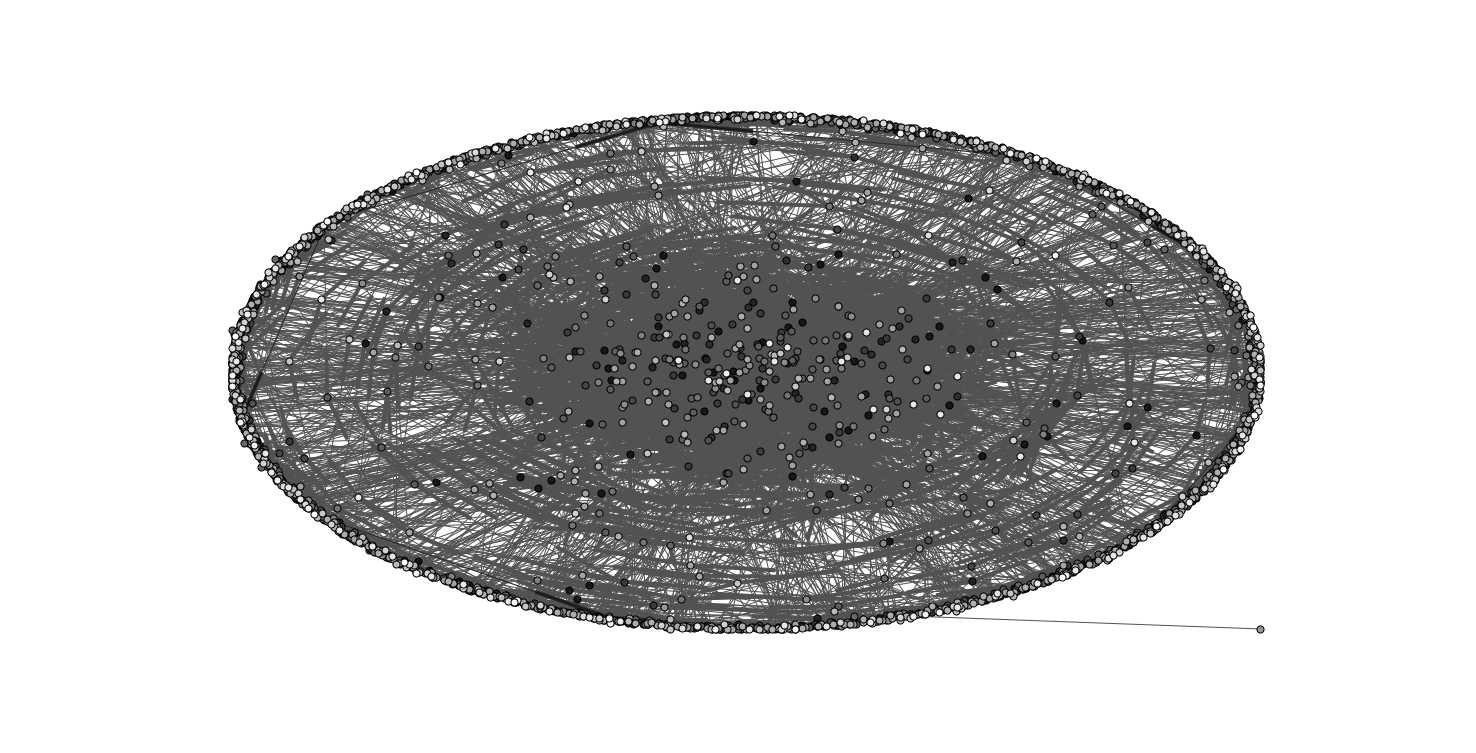

In [7]:
plt.figure(num=None, figsize=(20, 10), dpi=1500)
size=len(new_list_of_dicts)
count=0
for i in range(0,len(new_list_of_dicts)):
    count = count + 1.
    G=nx.DiGraph(new_list_of_dicts[i])
    pos = pos=nx.spring_layout(G, scale=5)
    nx.draw(G,pos, edge_color='#535154',node_size=50,node_color = str(count / size))

nx.draw_networkx_edges(G,pos,alpha=0.5)
plt.show()

In [8]:
#first compute the best partition
partition = community.best_partition(H)

#drawing
plt.figure(num=None, figsize=(20, 10), dpi=1500)    
size = float(len(set(partition.values())))
pos=nx.spring_layout(H, scale=5)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(H, pos, list_nodes, node_size = 20, node_color = str(count / size))

nx.draw_networkx_edges(H,pos,alpha=0.5)
plt.show()

NameError: name 'H' is not defined

In [ ]:
#merging all the departments into one dataframe
merged_df=pd.concat([list_of_df_for_each_department[0],list_of_df_for_each_department[1],list_of_df_for_each_department[2],list_of_df_for_each_department[3],list_of_df_for_each_department[4],list_of_df_for_each_department[5],list_of_df_for_each_department[6],list_of_df_for_each_department[7],list_of_df_for_each_department[8],list_of_df_for_each_department[9],list_of_df_for_each_department[10],list_of_df_for_each_department[11],list_of_df_for_each_department[12],list_of_df_for_each_department[13],list_of_df_for_each_department[14],list_of_df_for_each_department[15],list_of_df_for_each_department[16],list_of_df_for_each_department[17],list_of_df_for_each_department[18],list_of_df_for_each_department[19],list_of_df_for_each_department[20]])

In [ ]:
list_of_nodes=merged_df['COURSE NUMBER'].tolist()

In [ ]:
#we create a dict with course names and correponding course number
#since it will come in handy later
list_of_nodes_names=merged_df['COURSE NAME'].tolist()

In [ ]:
course_dict={}
for i in range(0,len(list_of_nodes_names)):
    course_dict[list_of_nodes_names[i]]=list_of_nodes[i]

In [ ]:
# now we list the links by using the prerequisites of each course
list_of_prerequistites=merged_df['RECOMMENDED PREREQUISITES'].tolist()

In [ ]:
#list_of_prerequistites[:50]

In [ ]:
#use list_of_nodes
#we create a dict that contain the nodes and its prerequisites
links_dict={}
for i in range(0,len(list_of_nodes)):
    links_dict[list_of_nodes[i]]=list_of_prerequistites[i]



In [ ]:
#links_dict.items()[45]

In [ ]:
#re.findall('\d+',links_dict.values()[45])

In [ ]:
#the prerequistites (represented by course number) are in a string format, so it is neccessary to utilize a reqular expression to extract the course numbers in each "string" of course numbers (courses that are prerequisites) and list them in a pythong list numerical objcet
#this extraction code ignores and passes prerequisites that are nan or none values i.e. non-existent prerequisites (no outgoing links). 
new_dict_list_of_links={}
for k,v in links_dict.items():
    try:
        temp_list=re.findall('\d+',v)
        new_dict_list_of_links[k]=temp_list
    except TypeError:
        pass

In [ ]:
#new_dict_list_of_links.items()[45]

In [ ]:
#new_dict_list_of_links[41078.0]

In [ ]:
#for i in new_dict_list_of_links[41078.0]:
#    print i

In [ ]:
#creating the graph using this dictionairy with nodes as keys and links as lists
G=nx.DiGraph(new_dict_list_of_links)
#nx.draw(G)

In [ ]:
#number of_edges
len(G.edges())

In [ ]:
#number of nodes
len(G.nodes())

In [ ]:
#list of tuples
list_of_links=G.edges()

In [ ]:
pos = pos=nx.spring_layout(G, scale=5)
plt.figure(num=None, figsize=(20, 10), dpi=1500)
nx.draw(G,pos, edge_color='#535154',node_size=50)
plt.show()

In [ ]:
deg_cen=nx.degree_centrality(G)
in_deg_cen=nx.in_degree_centrality(G)
out_deg_cen=nx.degree_centrality(G)
between_cen=nx.betweenness_centrality(G)
edge_betw_cen=nx.edge_betweenness_centrality(G)
eigen_cen=nx.eigenvector_centrality(G)

In [ ]:
WC=list(nx.weakly_connected_component_subgraphs(G))

In [ ]:
largest = max(nx.weakly_connected_component_subgraphs(G),key=len)

In [ ]:
#[len(c) for c in sorted(nx.weakly_connected_components(G), key=len, reverse=True)]

In [ ]:
#largest_cc = max(nx.weakly_connected_components(G), key=len)

In [ ]:
#Getting eigenvalue centrality for each node(philosopher) in-degree and out-degree using the networkx package
in_eigen_centrality = nx.eigenvector_centrality(G)
out_eigen_centrality = G.reverse()
out_eigen_centrality = nx.eigenvector_centrality(out_eigen_centrality)
sorted_in_eigen_centrality= sorted(in_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)
sorted_out_eigen_centrality= sorted(out_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)

In [ ]:
#getting the betweennness centrality of the philosophers in the philosopherrs network generated above using netwrokx package
betweenness_centrality_dict = nx.betweenness_centrality(G)
sorted_betweenness_centrality = sorted(betweenness_centrality_dict.items(), key=operator.itemgetter(1),reverse=True)


In [ ]:
in_degrees=list(G.in_degree().values())
out_degrees=list(G.out_degree().values())
#degree values
degrees=list(G.degree().values())

In [ ]:
#using  networkx to create the prober subgraph using the weakly connected component (WCC)
#generating corresponding undirected graph to the philosopher directed graph

G = max(nx.weakly_connected_component_subgraphs(G,copy=True),key=len)
H = G.to_undirected()

In [ ]:
#networkx function to get the assortativity
r = nx.degree_assortativity_coefficient(H)
print "Assortativity of the undirected graph: %s" %r

In [ ]:
#using the community package to calculate the modularity using the Louvain-algroithm
#for directed graphs the partition has to be set manually. in our case we can set it to represent the 21 departments
part = community.best_partition(H)


In [ ]:
#first compute the best partition
partition = community.best_partition(H)

#drawing
plt.figure(num=None, figsize=(20, 10), dpi=1500)    
size = float(len(set(partition.values())))
pos=nx.spring_layout(H, scale=5)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(H, pos, list_nodes, node_size = 20, node_color = str(count / size))

nx.draw_networkx_edges(H,pos,alpha=0.5)
plt.show()

In [ ]:
part = community.best_partition(H)
pos=nx.spring_layout(H, scale=5)
values = [part.get(node) for node in H.nodes()]
plt.figure(num=None, figsize=(20, 10), dpi=1500)    
nx.draw_spring(H, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()

In [ ]:
mod = community.modularity(part,H)
print("modularity:", mod)

In [ ]:
#shortest paths
shortest_p=nx.shortest_path(G)


In [ ]:
#weakly connected
#G = max(nx.weakly_connected_component_subgraphs(G,copy=True),key=len)
#giant connected
#H = max(nx.connected_component_subgraphs(H,copy=True), key=len)

In [ ]:
#getting the betweennness centrality of the philosophers in the philosopherrs network generated above using netwrokx package
#betweenness_centrality_dict = nx.betweenness_centrality(G)
betweenness_centrality_dict = nx.betweenness_centrality(H)

sorted_betweenness_centrality = sorted(betweenness_centrality_dict.items(), key=operator.itemgetter(1),reverse=True)
for i in range(5):
    print "The Course named: %s. \t Betweenness centrality value is: %s." %(sorted_betweenness_centrality[i][0],sorted_betweenness_centrality[i][1])

In [ ]:
#Getting eigenvalue centrality for each node(philosopher) in-degree and out-degree using the networkx package
"""
in_eigen_centrality = nx.eigenvector_centrality(G)
out_eigen_centrality = G.reverse()
out_eigen_centrality = nx.eigenvector_centrality(out_eigen_centrality)
sorted_in_eigen_centrality= sorted(in_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)
sorted_out_eigen_centrality= sorted(out_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)
"""

In [ ]:
"""
for i in range(5):
    print "The course name is: %s. \t \t  In-degree Eigenvector centrality value is: %s." %(sorted_in_eigen_centrality[i][0],sorted_in_eigen_centrality[i][1])
"""

In [ ]:
"""
for i in range(5):
    print "The course name is: %s. \t \t Out-degree Eigenvector centrality value is: %s." %(sorted_out_eigen_centrality[i][0],sorted_out_eigen_centrality[i][1])
"""

In [ ]:
#the shortest path can show which courses you have to have to gain acess to a specific course
shortest_p